# Data Visualization of RFM Values

In previous section, we've cleaned the dataset of online retail dataset saved as `online_retail_II_cleaned.csv`. In this section, we'll utilize these data to visualize the RFM value and also do data wrangling for ML modelling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv('online_retail_II_cleaned.csv')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
820417,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
820418,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
820419,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
820420,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID      int64
Country         object
revenue        float64
dtype: object

In [5]:
# Scaling the data types down for more size in space:

df['Country'] = df['Country'].astype('category')

df['Customer ID'] = df['Customer ID'].astype(int)
df['Customer ID'] = (
    pd.to_numeric(df['Customer ID'], downcast='unsigned'))

df['Price'] = (
    pd.to_numeric(df['Price'], downcast='float'))

df['Quantity'] = (
    pd.to_numeric(df['Quantity'], downcast='integer'))

## Changing InvoiceDate to date format for future data wrangling:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int16
InvoiceDate    datetime64[ns]
Price                 float32
Customer ID            uint16
Country              category
revenue               float64
dtype: object

## Visual Inspection: Daily Transaction

In [7]:
df['date'] = pd.to_datetime(df['InvoiceDate'].dt.date)

In [8]:
transaction_per_date = df.groupby(['date']).agg(
    min_revenue = ('revenue', lambda x: x[x > 0].min()),
    max_revenue = ('revenue', lambda x: x[x > 0].max()),
    avg_revenue = ('revenue', lambda x: x[x > 0].mean()),
    median_revenue = ('revenue', lambda x: x[x > 0].median()),
    
    min_return = ('revenue', lambda x: x[x < 0].min()),
    max_return = ('revenue', lambda x: x[x < 0].max()),
    avg_return = ('revenue', lambda x: x[x < 0].mean()),
    median_return = ('revenue', lambda x: x[x < 0].median())    
)

In [9]:
transaction_per_date

,min_revenue,max_revenue,avg_revenue,median_revenue,min_return,max_return,avg_return,median_return
date,,,,,,,,
2009-12-01,0.21,1160.0,19.864822,12.50,-68.85,-1.25,-12.275833,-10.075
2009-12-02,0.19,1224.0,23.125488,8.85,-96.00,-1.70,-23.053333,-10.950
2009-12-03,0.29,1800.0,28.535370,12.60,-932.40,-0.42,-97.535750,-15.000
2009-12-04,0.06,495.0,17.461918,10.20,-54.75,-1.25,-13.982000,-8.500
2009-12-05,5.76,139.3,24.507625,17.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011-12-05,0.19,955.5,16.633135,8.30,-238.00,-0.85,-20.314783,-5.100
2011-12-06,0.12,1401.6,17.925360,8.50,-637.50,-0.29,-25.053939,-12.530
2011-12-07,0.21,3861.0,31.819921,12.75,-39.52,-1.25,-8.444074,-6.240


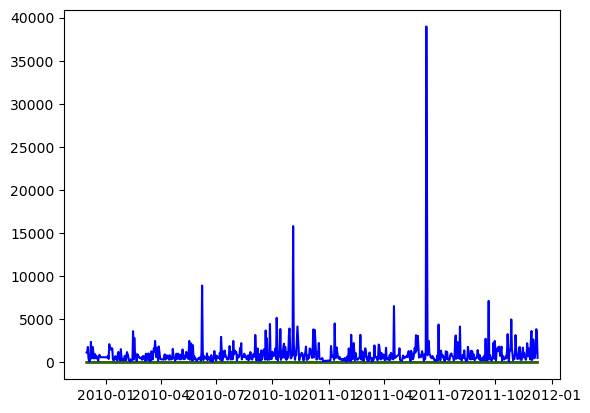

In [10]:
plt.plot(transaction_per_date['min_revenue'], 'k')
plt.plot(transaction_per_date['avg_revenue'], 'r')
plt.plot(transaction_per_date['median_revenue'], 'g')
plt.plot(transaction_per_date['max_revenue'], 'b')

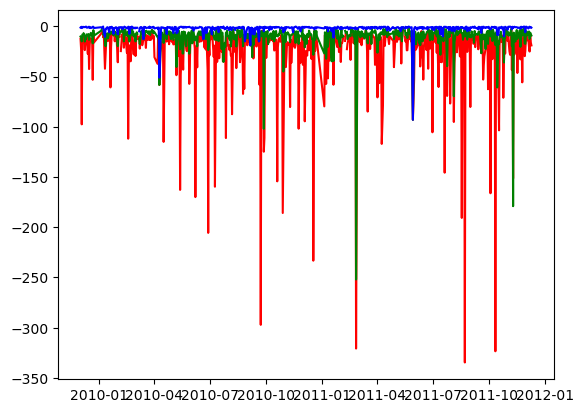

In [11]:
plt.plot(transaction_per_date['avg_return'], 'r')
plt.plot(transaction_per_date['median_return'], 'g')
plt.plot(transaction_per_date['max_return'], 'b')

As we can see on the first graph that most transactions are in the range of 0-5000 pounds, while a number of outliers have a transaction of 10000-40000 pounds.

The second graph of the return doesn't exceed 350 pounds for the whole transactions--the number is not as many compared to the generated revenue.

## Visual Inspection: Customer Behavior

To visualize customer behavior, we need main features of RFM, in this case the columns consist of:

### Main Features (for data-viz):
* `recency` : Time between the first and last orders,
* `frequency` : Number of orders placed by a customer,
* `T` : Time between first placed order to the end of features period,
* `monetary_value` : Sum of revenue in all orders of a customer

In [14]:
import datetime as dt

# Latest time taken from tail of dataset: '2011-12-09 12:50:00'
latest_date = dt.datetime(2011, 12, 9, 12, 50, 0)

def rfm_main_summary(
            dataset: pd.DataFrame,
    customer_id_col: str,
       datetime_col: str,
       quantity_col: str,
        revenue_col: str):
    
    agg_funcs = {
        datetime_col: [lambda x: (latest_date - x.max()).days,   # Recency
                       lambda x: (x.max() - x.min()).days     ], # T
        quantity_col: [lambda x: x.sum(),    # Total Quantity
                       lambda x: len(x) ],   # Frequency
         revenue_col:  lambda x: x.sum()     # Monetary Value
    }
    
    rfm_table = (dataset.groupby([customer_id_col, datetime_col])
                     .agg(agg_funcs)
                     .reset_index()
                     .droplevel(0, axis='columns'))
    rfm_table.columns = ['customer_id', 'invoice_date', 
                         'recency', 'T', 'total_quantity', 
                         'frequency', 'monetary_value']

    return rfm_table

In [15]:
rfm_table = rfm_main_summary(df, 'Customer ID', 
                'InvoiceDate', 'Quantity', 'revenue')

In [16]:
# Don't forget to put the country as the parameter we'll visualize
rfm_table = pd.merge(rfm_table, df[['Customer ID', 'Country']],
                    how='inner', left_on='customer_id', right_on='Customer ID')

In [17]:
rfm_table

,customer_id,invoice_date,recency,T,total_quantity,frequency,monetary_value,Customer ID,Country
0,12346,2009-12-18 10:55:00,721,0,1,1,1.00,12346,United Kingdom
1,12346,2009-12-18 10:55:00,721,0,1,1,1.00,12346,United Kingdom
2,12346,2009-12-18 10:55:00,721,0,1,1,1.00,12346,United Kingdom
3,12346,2009-12-18 10:55:00,721,0,1,1,1.00,12346,United Kingdom
4,12346,2009-12-18 10:55:00,721,0,1,1,1.00,12346,United Kingdom
...,...,...,...,...,...,...,...,...,...
32982685,18287,2011-10-28 09:29:00,42,0,108,3,70.68,18287,United Kingdom
32982686,18287,2011-10-28 09:29:00,42,0,108,3,70.68,18287,United Kingdom
32982687,18287,2011-10-28 09:29:00,42,0,108,3,70.68,18287,United Kingdom
32982688,18287,2011-10-28 09:29:00,42,0,108,3,70.68,18287,United Kingdom


## Data Visualization: RFM Heatmap

One way to visualize the whole RFM values is by making a heatmap of recency-frequency and monetary value. We'll be segmenting the customers' RFM into quantiles based on values of recency-frequency, and then we'll map the respective omnetary values with the color.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

rfm_q = rfm_table[['customer_id', 'recency', 'frequency', 'monetary_value']].copy()

rfm_q['recency'] = pd.qcut(rfm_q['recency'], 8, duplicates='drop')
rfm_q['frequency'] = pd.qcut(rfm_q['frequency'], 8, duplicates='drop')

rfm_value_cohorts = rfm_q.groupby(['recency', 'frequency']).sum('monetary_value').reset_index()

In [19]:
print(rfm_value_cohorts['recency'].value_counts())
print(rfm_value_cohorts['frequency'].value_counts())

recency
(-0.001, 61.0]    7
(61.0, 151.0]     7
(151.0, 254.0]    7
(254.0, 371.0]    7
(371.0, 433.0]    7
(433.0, 528.0]    7
(528.0, 631.0]    7
(631.0, 738.0]    7
Name: count, dtype: int64
frequency
(0.999, 4.0]     8
(4.0, 10.0]      8
(10.0, 17.0]     8
(17.0, 26.0]     8
(26.0, 37.0]     8
(37.0, 57.0]     8
(57.0, 541.0]    8
Name: count, dtype: int64


<Axes: xlabel='frequency', ylabel='recency'>

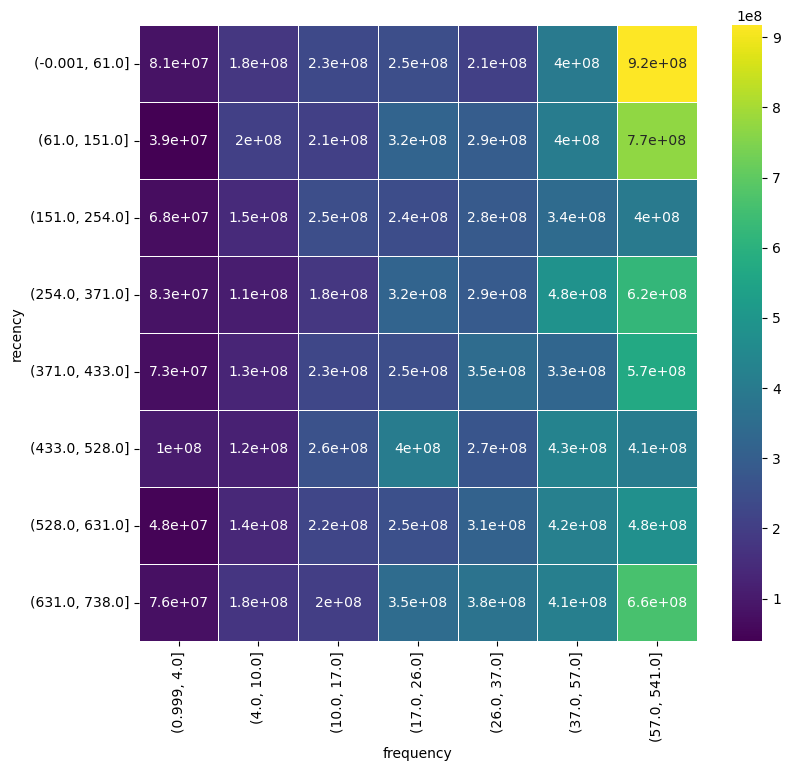

In [20]:
rfm_value_cohorts_pivot = rfm_value_cohorts.pivot(
    index='recency', columns='frequency', values='monetary_value')
_, ax = plt.subplots(1, 1, figsize=(9, 8))
sns.heatmap(rfm_value_cohorts_pivot, annot=True, 
    linewidth=.5, cmap='viridis', ax=ax)

### Insights:

We can see that at the top-right area corner, with low recency (latest customers) and high frequency (high number of transactions), the box is colored brighter (blue-green to yellow) as ones with higher monetary value.

On the other hand, at the down-left corner, high recency (one-time and/or first customers) and low frequency (low number of transactions), the box is colored darker (blue-purple to dark purple) as ones with lower monetary value.

## Data Visualization: Whole RFM by Country

One way to visualize the whole RFM values is to group it by country. Here we'll see which countries have a good RFM variables, which consist of:

* Low recency meaning latest date of transactions,
* High frequency meaning high number of transactions, and
* High monetary value meaning high generated revenue.

These inisghts can be used for a more-targeted marketing towards high-engagement customers.

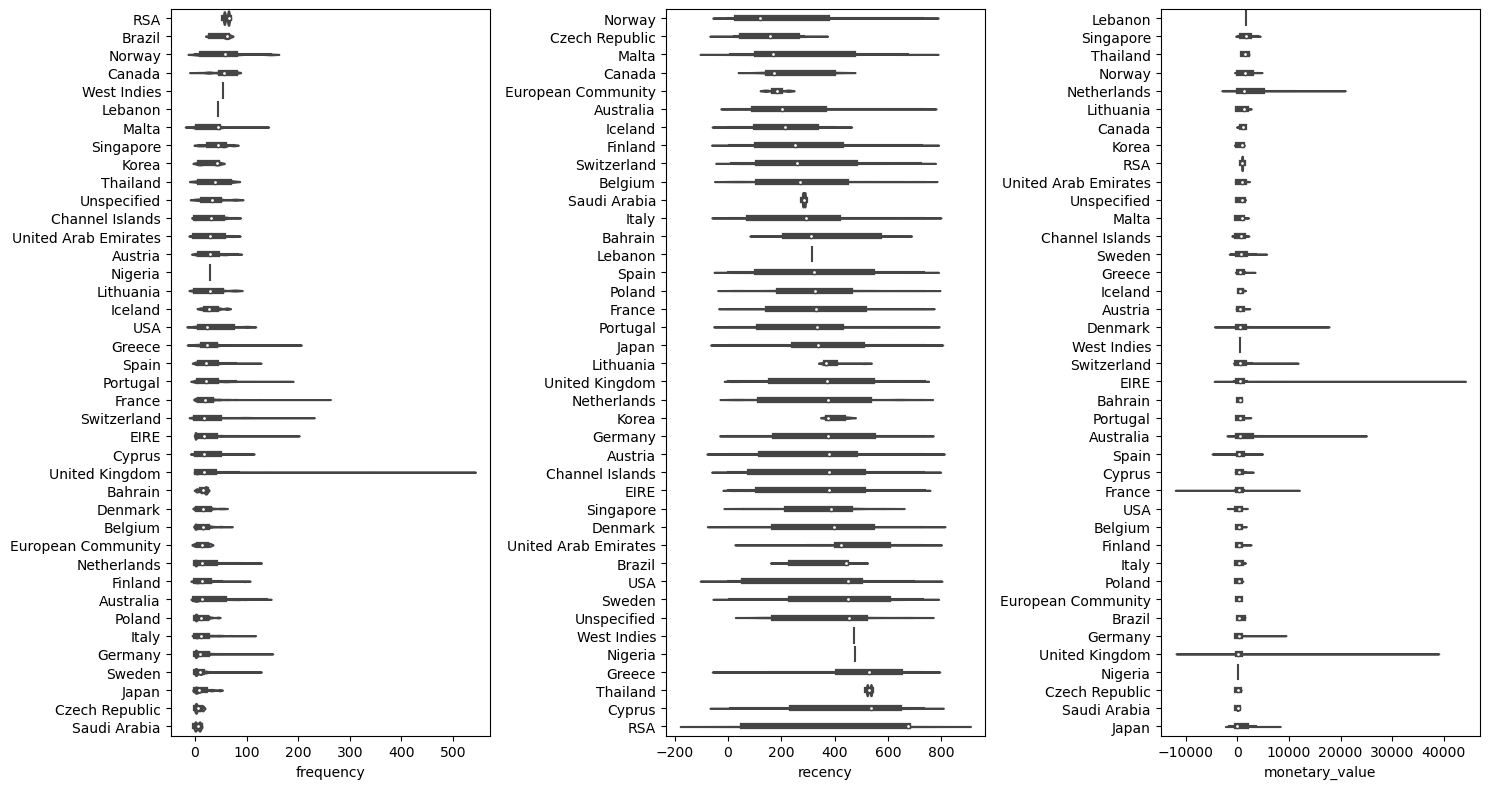

In [21]:
_, ax = plt.subplots(1, 3, figsize=(3*5, 8))
grouping_dim = 'Country'

for i, metric in enumerate(['frequency', 'recency', 'monetary_value']):
    if metric == 'recency':
        rfm_order = (rfm_table.groupby(grouping_dim)[metric]
                         .median().sort_values().iloc[::1].index)
    else:
        rfm_order = (rfm_table.groupby(grouping_dim)[metric]
                         .median().sort_values().iloc[::-1].index)
    sns.violinplot(data=rfm_table, x=metric, y=grouping_dim,
                   orient=None, inner='box', order=rfm_order,
                   fill=False, ax=ax[i])
    ax[i].set_ylabel(None)
plt.tight_layout()

### Insights:

* Customers from Norway, Czech Republic, Malta, and Canada in average has the lowest recency. (*Violin-plot 2*)

* Customers from RSA or Republic of South Africa, Brazil, Norway, and Canada in average has the highest frequency. (*Violin-plot 1*)

* Customers from Lebanon, Singapore, Thailand, Norway has the highest monetary value being on top. However, there are outliers on several country that show the higher generated revenue on customers from several countries such as United Kingdom (home country), EIRE or Ireland, Australia, Denmark, and the Netherlands. (*Violin-plot 3*)